##### IMPORT NECESSARY LIBRARIES

In [374]:
# Importing necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report, accuracy_score,roc_auc_score,confusion_matrix 

##### LOAD THE DATASET

In [376]:
# Load the dataset
data = pd.read_csv('adult.csv')
print(data.head())

   age workclass  fnlwgt     education  education num marital status  \
0   90         ?   77053       HS-grad              9        Widowed   
1   82   Private  132870       HS-grad              9        Widowed   
2   66         ?  186061  Some-college             10        Widowed   
3   54   Private  140359       7th-8th              4       Divorced   
4   41   Private  264663  Some-college             10      Separated   

          occupation   relationship   race     sex  capital gain  \
0                  ?  Not-in-family  White  Female             0   
1    Exec-managerial  Not-in-family  White  Female             0   
2                  ?      Unmarried  Black  Female             0   
3  Machine-op-inspct      Unmarried  White  Female             0   
4     Prof-specialty      Own-child  White  Female             0   

   capital loss  hours per week native country income  
0          4356              40  United-States  <=50K  
1          4356              18  United-States

##### EXPLORATORY DATA ANALYSIS (EDA)

In [378]:
data.shape

(32561, 15)

In [379]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education num   32561 non-null  int64 
 5   marital status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital gain    32561 non-null  int64 
 11  capital loss    32561 non-null  int64 
 12  hours per week  32561 non-null  int64 
 13  native country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [380]:
data.describe(include = 'all' )

,age,workclass,fnlwgt,education,education num,marital status,occupation,relationship,race,sex,capital gain,capital loss,hours per week,native country,income
count,32561.000000,32561,3.256100e+04,32561,32561.000000,32561,32561,32561,32561,32561,32561.000000,32561.000000,32561.000000,32561,32561
unique,NaN,9,NaN,16,NaN,7,15,6,5,2,NaN,NaN,NaN,42,2
top,NaN,Private,NaN,HS-grad,NaN,Married-civ-spouse,Prof-specialty,Husband,White,Male,NaN,NaN,NaN,United-States,<=50K
freq,NaN,22696,NaN,10501,NaN,14976,4140,13193,27816,21790,NaN,NaN,NaN,29170,24720
mean,38.581647,NaN,1.897784e+05,NaN,10.080679,NaN,NaN,NaN,NaN,NaN,1077.648844,87.303830,40.437456,NaN,NaN
std,13.640433,NaN,1.055500e+05,NaN,2.572720,NaN,NaN,NaN,NaN,NaN,7385.292085,402.960219,12.347429,NaN,NaN
min,17.000000,NaN,1.228500e+04,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,NaN,NaN
25%,28.000000,NaN,1.178270e+05,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
50%,37.000000,NaN,1.783560e+05,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
75%,48.000000,NaN,2.370510e+05,NaN,12.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,45.000000,NaN,NaN


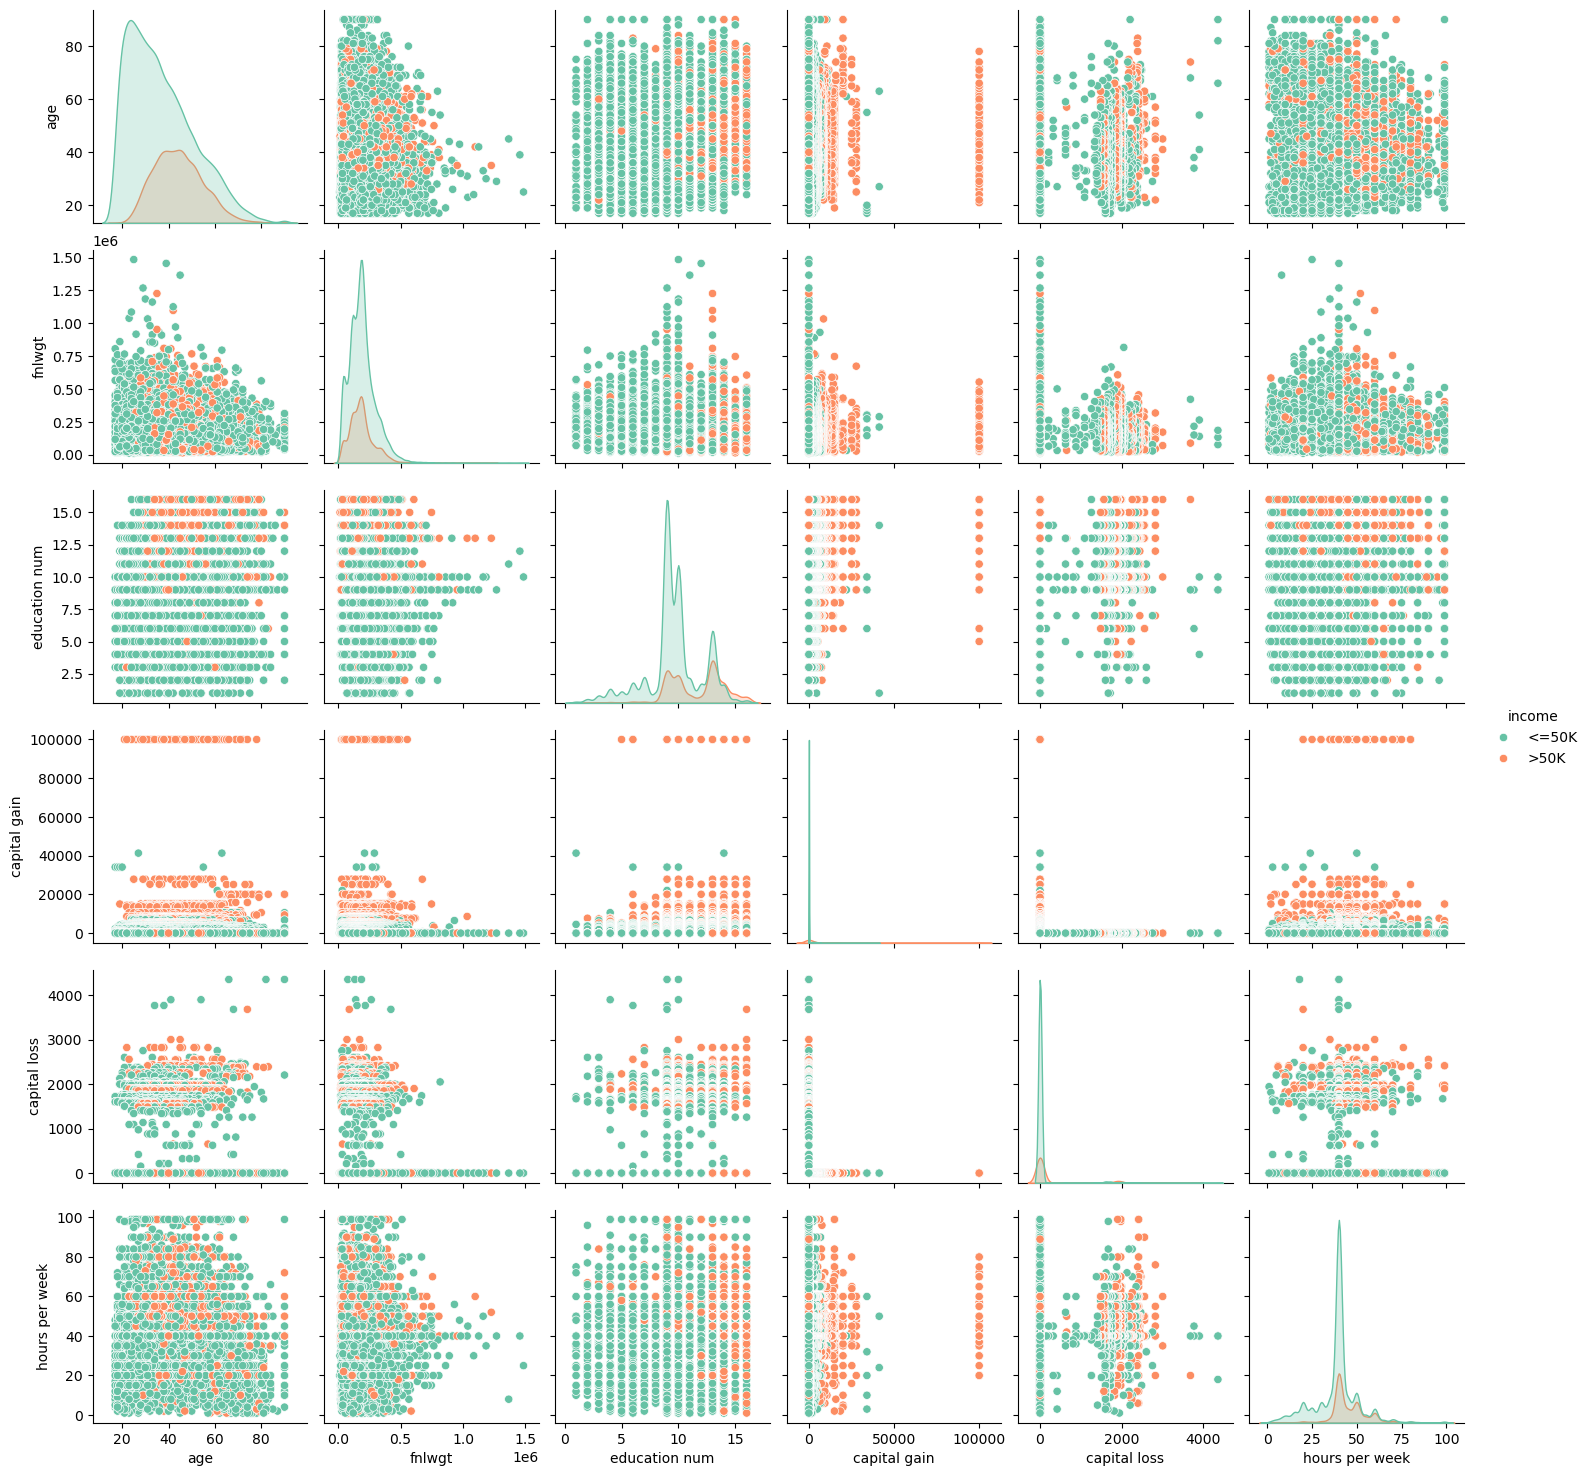

In [381]:
# Display Pair plots for numerical columns
sns.pairplot(data, hue='income', diag_kind='kde', palette='Set2')
plt.show()

##### DATA PREPROCESSING

In [383]:
# Display the count of missing values before imputation
print("\nMissing values before imputation:")
print(data.isnull().sum())


Missing values before imputation:
age               0
workclass         0
fnlwgt            0
education         0
education num     0
marital status    0
occupation        0
relationship      0
race              0
sex               0
capital gain      0
capital loss      0
hours per week    0
native country    0
income            0
dtype: int64


##### MISSING VALUES 

In [385]:
# Handle missing values
categorical_cols = data.select_dtypes(include=['object']).columns
numerical_cols = data.select_dtypes(include=['int64', 'float64']).columns

In [386]:
# Replace 0 in numerical columns with the median using SimpleImputer
numerical_imputer = SimpleImputer(missing_values=0, strategy='median')
data[numerical_cols] = numerical_imputer.fit_transform(data[numerical_cols])

In [387]:
data[numerical_cols]

,age,fnlwgt,education num,capital gain,capital loss,hours per week
0,90.0,77053.0,9.0,7298.0,4356.0,40.0
1,82.0,132870.0,9.0,7298.0,4356.0,18.0
2,66.0,186061.0,10.0,7298.0,4356.0,40.0
3,54.0,140359.0,4.0,7298.0,3900.0,40.0
4,41.0,264663.0,10.0,7298.0,3900.0,40.0
...,...,...,...,...,...,...
32556,22.0,310152.0,10.0,7298.0,1887.0,40.0
32557,27.0,257302.0,12.0,7298.0,1887.0,38.0
32558,40.0,154374.0,9.0,7298.0,1887.0,40.0
32559,58.0,151910.0,9.0,7298.0,1887.0,40.0


In [388]:
# Replace '?' in categorical columns with 'Unknown'
categorical_cols = data.select_dtypes(include=['object']).columns
data[categorical_cols] = data[categorical_cols].replace('?', 'Unknown')

In [389]:
data[categorical_cols]

,workclass,education,marital status,occupation,relationship,race,sex,native country,income
0,Unknown,HS-grad,Widowed,Unknown,Not-in-family,White,Female,United-States,<=50K
1,Private,HS-grad,Widowed,Exec-managerial,Not-in-family,White,Female,United-States,<=50K
2,Unknown,Some-college,Widowed,Unknown,Unmarried,Black,Female,United-States,<=50K
3,Private,7th-8th,Divorced,Machine-op-inspct,Unmarried,White,Female,United-States,<=50K
4,Private,Some-college,Separated,Prof-specialty,Own-child,White,Female,United-States,<=50K
...,...,...,...,...,...,...,...,...,...
32556,Private,Some-college,Never-married,Protective-serv,Not-in-family,White,Male,United-States,<=50K
32557,Private,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,United-States,<=50K
32558,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,United-States,>50K
32559,Private,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,United-States,<=50K


In [390]:
# Display the count of missing values in each column after imputation
print("\nMissing values after imputation:")
print(data.isnull().sum())


Missing values after imputation:
age               0
workclass         0
fnlwgt            0
education         0
education num     0
marital status    0
occupation        0
relationship      0
race              0
sex               0
capital gain      0
capital loss      0
hours per week    0
native country    0
income            0
dtype: int64


##### ONE-HOT ENCODING

In [392]:
# Convert categorical columns to numerical values using one-hot encoding
categorical_columns = data.select_dtypes(include=['object']).columns
data_encoded = pd.get_dummies(data, columns=categorical_columns, drop_first=True)
#Display the transformed data
data_encoded.head()

,age,fnlwgt,education num,capital gain,capital loss,hours per week,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,...,native country_Scotland,native country_South,native country_Taiwan,native country_Thailand,native country_Trinadad&Tobago,native country_United-States,native country_Unknown,native country_Vietnam,native country_Yugoslavia,income_>50K
0,90.0,77053.0,9.0,7298.0,4356.0,40.0,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
1,82.0,132870.0,9.0,7298.0,4356.0,18.0,False,False,True,False,...,False,False,False,False,False,True,False,False,False,False
2,66.0,186061.0,10.0,7298.0,4356.0,40.0,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
3,54.0,140359.0,4.0,7298.0,3900.0,40.0,False,False,True,False,...,False,False,False,False,False,True,False,False,False,False
4,41.0,264663.0,10.0,7298.0,3900.0,40.0,False,False,True,False,...,False,False,False,False,False,True,False,False,False,False


##### LABEL ENCODING

In [394]:
# Encode categorical columns
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

In [395]:
# Print encoded categorical columns
print("\nEncoded Categorical Columns:")
for col in categorical_cols:
    print(f"{col}: {data[col].unique()}")


Encoded Categorical Columns:
workclass: [7 3 6 0 5 4 1 8 2]
education: [11 15  5  0 10 14  9 12  1  7  8  3  4  2  6 13]
marital status: [6 0 5 4 2 3 1]
occupation: [14  3  6  9  7  0  2 13  5 11  4 12 10  1  8]
relationship: [1 4 3 2 0 5]
race: [4 2 1 3 0]
sex: [0 1]
native country: [38 39 25 11 40  2 35 18 29 37  1 34 14 32 30 19  8 10 21 23 16 15  4 20
  0 28 26  5 13  7 17  3 12 22  6  9 41 33 31 24 36 27]
income: [0 1]


##### DEFINE FEATURES AND TARGET VARIABLE

In [397]:
# Split the data into features and target variable
X = data.drop('income', axis=1)
y = data['income']

##### SPLIT THE DATA

In [399]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

##### STANDARDIZATION

In [401]:
# Standardize the numerical features
scaler = StandardScaler()
X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])

##### HANDLE IMBALANCED DATA

income
1    19775
0    19775
Name: count, dtype: int64


<Axes: xlabel='income', ylabel='count'>

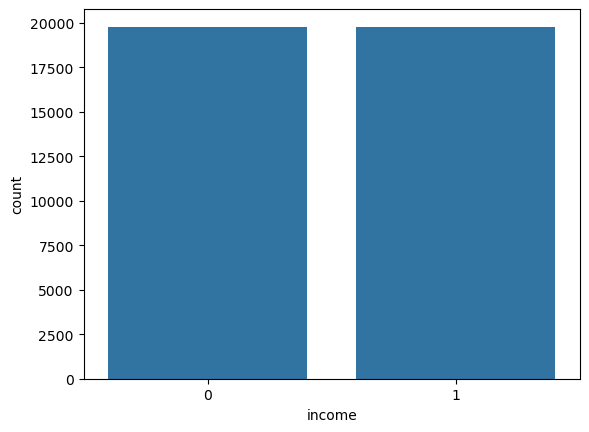

In [403]:
# Apply SMOTE to balance the training set
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)
print(y_train.value_counts())
sns.countplot(x=y_train)

##### CLASSIFICATION ALGORITHM 

##### DECISION TREE CLASSIFIER

##### TRAIN THE MODEL

In [407]:
# Hyperparameter tuning and cross-validation for Decision Tree
dt = DecisionTreeClassifier(random_state=42)
param_grid_dt = {'max_depth': [3, 5, 7, 10], 'min_samples_split': [2, 5, 10]}
stratified_kfold = StratifiedKFold(n_splits=5)
grid_search_dt = GridSearchCV(dt, param_grid_dt, cv=stratified_kfold, scoring='accuracy')
grid_search_dt.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_depth': [3, 5, 7, 10],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

##### EVALUATE THE MODEL

In [409]:
# Best Decision Tree model
best_dt = grid_search_dt.best_estimator_
y_pred_dt = best_dt.predict(X_test)
dt_accuracy = accuracy_score(y_test, y_pred_dt)
dt_auc = roc_auc_score(y_test, best_dt.predict_proba(X_test)[:, 1])

In [410]:
# Evaluate the models
print(f"Accuracy Score: {dt_accuracy:.2f}")
print(f"ROC-AUC Score: {dt_auc:.2f}")
print("\nBest Decision Tree Model Parameters:")
print(grid_search_dt.best_params_)
print("\nDecision Tree Classification Report:")
print(classification_report(y_test, y_pred_dt, zero_division=0))

Accuracy Score: 0.81
ROC-AUC Score: 0.87

Best Decision Tree Model Parameters:
{'max_depth': 10, 'min_samples_split': 2}

Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.81      0.86      4945
           1       0.57      0.79      0.66      1568

    accuracy                           0.81      6513
   macro avg       0.75      0.80      0.76      6513
weighted avg       0.84      0.81      0.82      6513



##### CONFUSION MATRIX

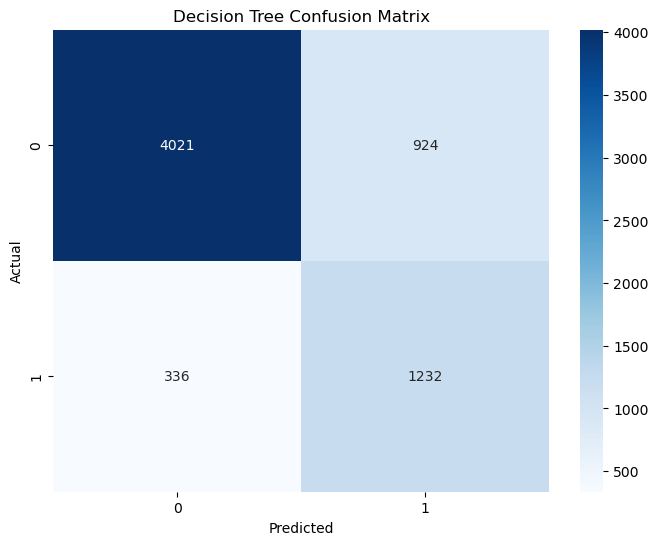

In [412]:
# Confusion Matrix for Decision Tree
cm_dt = confusion_matrix(y_test, y_pred_dt)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Blues')
plt.title("Decision Tree Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

##### RANDOM FOREST CLASSIFIER

##### TRAIN THE MODEL

In [415]:
# Hyperparameter tuning and cross-validation for Random Forest
rf = RandomForestClassifier(random_state=42)
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10]
}
stratified_kfold = StratifiedKFold(n_splits=5)
grid_search_rf = GridSearchCV(rf, param_grid_rf, cv=stratified_kfold, scoring='accuracy')
grid_search_rf.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [5, 10, 15],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy')

##### EVALUATE THE MODEL

In [417]:
# Best Random Forest model
best_rf = grid_search_rf.best_estimator_
y_pred_rf = best_rf.predict(X_test)
rf_accuracy = accuracy_score(y_test, y_pred_rf)
rf_auc = roc_auc_score(y_test, best_rf.predict_proba(X_test)[:, 1])

In [418]:
# Evaluate Random Forest model
print(f"Accuracy Score: {rf_accuracy:.2f}")
print(f"ROC-AUC Score: {rf_auc:.2f}")
print("Best Random Forest Model Parameters:")
print(grid_search_rf.best_params_)
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf, zero_division=0))

Accuracy Score: 0.82
ROC-AUC Score: 0.90
Best Random Forest Model Parameters:
{'max_depth': 15, 'min_samples_split': 2, 'n_estimators': 100}
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.83      0.87      4945
           1       0.59      0.79      0.68      1568

    accuracy                           0.82      6513
   macro avg       0.76      0.81      0.78      6513
weighted avg       0.85      0.82      0.83      6513



##### CONFUSION MATRIX

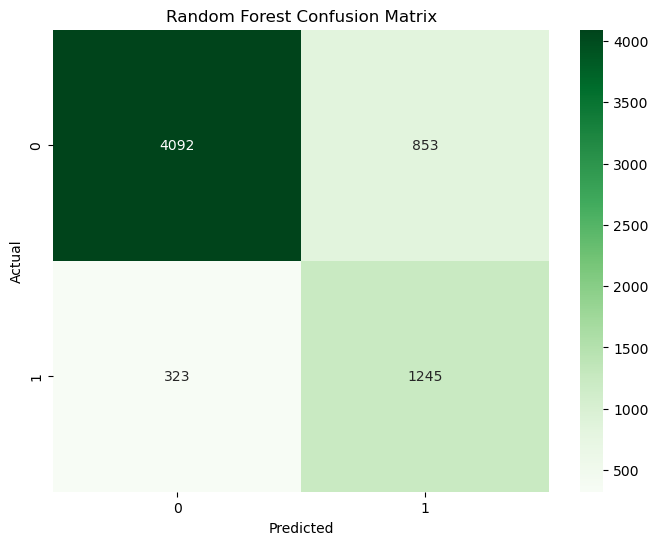

In [420]:
# Confusion matrix for Random Forest
cm_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Greens')
plt.title("Random Forest Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

##### K-NEAREST NEIGHBORS (KNN) CLASSIFIER

##### TRAIN THE MODEL

In [423]:
# Hyperparameter tuning and cross-validation for KNN
knn = KNeighborsClassifier()
param_grid_knn = {'n_neighbors': [3, 5, 7, 9], 'weights': ['uniform', 'distance']}
stratified_kfold = StratifiedKFold(n_splits=5)
grid_search_knn = GridSearchCV(knn, param_grid_knn, cv=stratified_kfold, scoring='accuracy')
grid_search_knn.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 5, 7, 9],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

##### EVALUATE THE MODEL

In [425]:
# Best KNN model
best_knn = grid_search_knn.best_estimator_
y_pred_knn = best_knn.predict(X_test)
knn_accuracy = accuracy_score(y_test, y_pred_knn)
knn_auc = roc_auc_score(y_test, best_knn.predict_proba(X_test)[:, 1])

In [426]:
# Evaluate the models
print(f"Accuracy Score: {knn_accuracy:.2f}")
print(f"ROC-AUC Score: {knn_auc:.2f}")
print("Best KNN Model Parameters:")
print(grid_search_knn.best_params_)
print("\nKNN Classification Report:")
print(classification_report(y_test, y_pred_knn, zero_division=0))

Accuracy Score: 0.78
ROC-AUC Score: 0.80
Best KNN Model Parameters:
{'n_neighbors': 3, 'weights': 'distance'}

KNN Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.80      0.84      4945
           1       0.53      0.70      0.60      1568

    accuracy                           0.78      6513
   macro avg       0.71      0.75      0.72      6513
weighted avg       0.80      0.78      0.79      6513



##### CONFUSION MATRIX

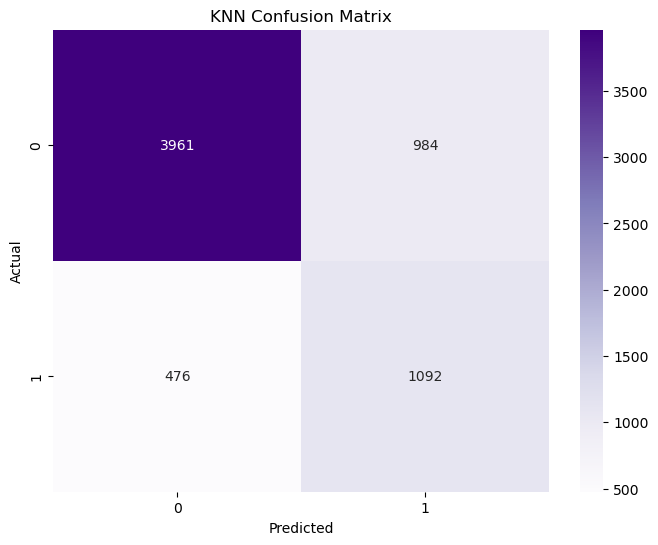

In [428]:
# Confusion matrix for KNN 
cm_knn = confusion_matrix(y_test, y_pred_knn)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Purples')
plt.title("KNN Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()